# Đồ án cuối kỳ

**Các thành viên:**
1. MSSV: 18120143 - Họ tên: Nguyễn Đình Hoàng Phúc
2. MSSV: 18120512 - Họ tên: Lê Đặng Thiên Phúc

---

## Import thư viện

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import seaborn as sns

## Thu thập dữ liệu

Trong đồ án lần này nhóm chúng em sử dụng bộ dữ liệu thông tin các **Ứng dụng trên Google Play Store**. <br>
Bộ dữ liệu được tạo vào 05/04/19 và cập nhật lần cuối vào 16/06/21 trên trang Kaggle, [đường dẫn](https://www.kaggle.com/gauthamp10/google-playstore-apps). Bộ dữ liệu được thu thập bằng cách crawl từ trang web của Google Play sử dụng tool Scrapy chạy trên cloud VM và có chứa nhiều thông tin liên quan đến ứng dụng như tên, kích thước, rating,...

## Khám phá dữ liệu

### Đọc dữ liệu từ file .csv vào Dataframe

In [2]:
gps_df = pd.read_csv('Google-Playstore.csv')
gps_df.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35


### Dữ liệu gồm bao nhiêu dòng và cột?

In [3]:
num_rows, num_cols = gps_df.shape
print('Bộ dữ liệu có {} dòng và {} cột'.format(num_rows, num_cols))

Bộ dữ liệu có 2312944 dòng và 24 cột


### Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

Mỗi dòng là chi tiết thông tin của một ứng dụng trên Google Play Store. Có vẻ không có dòng nào có ý nghĩa khác.

### Dữ liệu có các dòng bị lặp không?

In [77]:
duplicated_rows = gps_df.duplicated()
num_duplicated_rows = len(gps_df[duplicated_rows])
print("Có {} dòng bị lặp.".format(num_duplicated_rows))

Có 0 dòng bị lặp.


### Mỗi cột có ý nghĩa gì?

Dưới đây là phần mô tả của tác giả về các cột trong file "Google-Playstore.csv":

- **App Name**: tên ứng dụng.
- **App Id**:  id của ứng dụng.
- **Category**: thể loại ứng dụng.
- **Rating**: chỉ số đánh giá trung bình.
- **Rating Count**: số lượt đánh giá.
- **Installs**: số lượt tải.
- **Minimum Installs**: số lượt tải tối thiểu.
- **Maximum Installs**: số lượt tải tối đa.
- **Free**: ứng dụng là mĩễn phí hay trả tiền.
- **Price**: giá ứng dụng.
- **Currency**: đồng tiền dùng để thanh toán.
- **Size**: kích cỡ ứng dụng
- **Minimum Android**: phiên bản android tối thiểu để chạy ứng dụng.
- **Developer Id**: ID của nhà phát triển.
- **Developer Website**: Web của nhà phát triển.
- **Developer Email**: Email của nhà phát triển.
- **Released**: Ngày phát hành.
- **Last Updated**: Ngày cập nhật gần đây nhất.
- **Content Rating**: Đánh giá nội dung ứng dụng theo chính sách Google Play.
- **Privacy Policy**: Chính sách bảo mật.
- **Ad Supported**: Ứng dụng có quảng cáo không.
- **In app purchases**: Có thực hiện mua bán trong ứng dụng không.
- **Editor Choice**: Có được đánh giá chuẩn Editor Choice the Google Play không?
- **Scraped Time**: thời gian thu nhập dữ liệu (GMT)

### Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

In [78]:
col_dtypes = gps_df.dtypes
col_dtypes

App Name              object
App Id                object
Category              object
Rating               float64
Rating Count         float64
Installs              object
Minimum Installs     float64
Maximum Installs       int64
Free                    bool
Price                float64
Currency              object
Size                  object
Minimum Android       object
Developer Id          object
Developer Website     object
Developer Email       object
Released              object
Last Updated          object
Content Rating        object
Privacy Policy        object
Ad Supported            bool
In App Purchases        bool
Editors Choice          bool
Scraped Time          object
dtype: object

- Các cột `Rating`, `Rating Count`, `Minium Installs`, `Maximum Installs` `Price` có dạng numerical.
- Các cột `Free`, `Ad Supported`, `In App Purchases`, `Editors Choice` có kiểu `bool` thuộc dạng categorical.
- Các cột còn lại đều có kiểu là `object`. Do không có cảnh báo về mixed typed. Dự đoán các cột này có kiểu dữ liệu thật là `string`. Ta quan sát kỹ thêm một chút các cột này để xử lý.

#### Quan sát thêm các cột có kiểu `object`

Các hàm hỗ trợ:

In [19]:
def missing_ratio(s):
    return s.isna().mean() * 100
def num_diff_vals(s):
    return s.nunique()
def diff_vals(s):
    return s.dropna().unique()

Quan sát các cột có kiểu dữ liệu `object`.

In [5]:
object_col_df = gps_df[['App Name', 'App Id', 'Category', 'Installs', 'Currency',
       'Size', 'Minimum Android', 'Developer Id', 'Developer Website',
       'Developer Email', 'Released', 'Last Updated', 'Content Rating',
       'Privacy Policy',
       'Scraped Time']]
object_col_profiles_df = object_col_df.agg([missing_ratio, num_diff_vals, diff_vals])
object_col_profiles_df

,App Name,App Id,Category,Installs,Currency,Size,Minimum Android,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Scraped Time
missing_ratio,0.000086,0.0,0.0,0.004626,0.005837,0.008474,0.282324,0.001427,32.894657,0.00134,3.071972,0.0,0.0,18.199879,0.0
num_diff_vals,2177944,2312944,48,22,15,1657,154,758371,810440,950456,4158,3918,6,977743,67374
diff_vals,"[Gakondo, Ampere Battery Info, Vibook, Smart C...","[com.ishakwe.gakondo, com.webserveis.batteryin...","[Adventure, Tools, Productivity, Communication...","[10+, 5,000+, 50+, 100+, 1,000+, 500+, 50,000+...","[USD, XXX, CAD, EUR, INR, VND, GBP, BRL, KRW, ...","[10M, 2.9M, 3.7M, 1.8M, 6.2M, 46M, 2.5M, 16M, ...","[7.1 and up, 5.0 and up, 4.0.3 and up, 4.1 and...","[Jean Confident Irénée NIYIZIBYOSE, Webserveis...","[https://beniyizibyose.tk/#/, https://webserve...","[jean21101999@gmail.com, webserveis@gmail.com,...","[Feb 26, 2020, May 21, 2020, Aug 9, 2019, Sep ...","[Feb 26, 2020, May 06, 2021, Aug 19, 2019, Oct...","[Everyone, Teen, Mature 17+, Everyone 10+, Adu...","[https://beniyizibyose.tk/projects/, https://d...","[2021-06-15 20:19:35, 2021-06-15 20:19:36, 202..."


Quan sát kỹ hơn cột `Minimum Android`

In [81]:
object_col_profiles_df['Minimum Android']['diff_vals']

array(['7.1 and up', '5.0 and up', '4.0.3 and up', '4.1 and up',
       '6.0 and up', '4.4 and up', '4.0 and up', '4.2 and up',
       '2.1 and up', '7.0 and up', '2.2 and up', '2.3 and up',
       '4.3 and up', '5.1 and up', '1.6 and up', '3.0 and up',
       'Varies with device', '8.0 and up', '2.3.3 and up', '4.4W and up',
       '3.2 and up', '1.5 and up', '4.0.3 - 7.1.1', '3.1 and up',
       '2.0 and up', '1.0 and up', '1.1 and up', '2.0.1 and up',
       '4.4 - 6.0', '2.1 - 4.4', '4.0 - 5.0', '2.0 - 2.3.4', '2.2 - 4.4',
       '4.1 - 7.0', '4.1 - 6.0', '4.0 - 4.4W', '4.0 - 4.4', '4.0.3 - 7.0',
       '2.3 - 5.0', '4.0 - 7.1.1', '4.1 - 7.1.1', '4.0 - 7.0',
       '4.1 - 8.0', '4.0 - 6.0', '2.3 - 7.0', '4.0 - 8.0', '2.3 - 6.0',
       '2.1 - 2.3.4', '3.0 - 4.1.1', '2.2 - 3.0', '2.0 - 8.0',
       '4.0.3 - 8.0', '3.0 - 4.4W', '4.4 - 7.1.1', '4.4 - 8.0',
       '4.0.3 - 6.0', '1.6 - 4.0.4', '8.0', '2.3 - 5.1', '2.1 - 7.1.1',
       '2.3 - 4.4W', '4.4 - 7.0', '6.0 - 7.1.1', '2.3 - 4.

Quan sát dữ liệu và dựa và ý nghĩa, ta thấy:
- Các cột `App Name`, `App Id`, `Category`, `Currency`, `Developer Id`, `Developer Website`, `Developer Email`,`Content Rating`, `Privacy Policy`, chắc chắn được xếp vào categorical. 
- Các cột `Installs`: số lượt tải, `Size`: kích thước ứng dụng có thể được đưa sang kiểu số.
- Các cột `Released`, `Last Updated`, `Scraped Time`: có thể chuyển về datetime.
- Cột `Minimum Android` : là dữ liệu dạng khoảng, có thể tiền xử lý chia thành hai cột phiên bản hệ điều hành thấp nhất và cao nhất. Hai cột mới thêm vào có thể chuyển về dạng numerical, nhưng ta sẽ chưa chuyển vội. Sẽ tiền xử lý tiếp nếu thấy cần thiết.

#### Tiền xử lý

Ta tiền xử lý chuyển dữ liệu các cột được phân loại là numerical có kiểu object về lại kiểu số.

##### Chuyển cột `Size` sang dạng số:
Xem thử các pattern đứng sau dữ liệu số:

In [82]:
set(gps_df['Size'].str.extract(r'([^\d]+)$', expand=False).values)

{'G', 'M', 'Varies with device', 'k', nan}

Ta chỉ chấp nhận các pattern string của cột `Size` có dạng là:
- Chứa chuỗi: *Varies with device*
- Kích thước dưới dạng: `{số}M` (số Megabyte của ứng dụng).
- Kích thước dưới dạng: `{số}k` (số Kilobyte của ứng dụng). 
- Kích thước dưới dạng: `{số}G` (số Gigabyte của ứng dụng). 
Đếm xem thử có bao nhiêu dòng không có dạng như vậy:

In [4]:
out_of_pattern_rows = gps_df['Size'].str.replace(',','').str.extract(r'((?:Varies with device)|(?:\d+.\d+[MGk])|(?:\d+[MGk]))', expand=False).isna()
print("Số dòng không chuyển đổi được: ", len(gps_df[out_of_pattern_rows]))
print("Các dòng không chuyển đổi được có các giá trị: ",gps_df[out_of_pattern_rows]['Size'].unique())

Số dòng không chuyển đổi được:  196
Các dòng không chuyển đổi được có các giá trị:  [nan]


Chỉ có **196** dòng lạc loài do chúng mang giá trị "nan" cũng không đáng kể.

Mặc dù ý nghĩa của 'Varies with device' và không theo pattern là khác nhau. Trong đồ án này nhóm chúng em xem hai giá trị này là tương đương nhau là không thu thập được và để giá trị `N/A` cho chúng.

In [5]:
gps_df.loc[out_of_pattern_rows,'Size'] = np.nan
gps_df.loc[gps_df['Size']=='Varies with device','Size'] = np.nan

Tách phần số của cột `Size`

In [6]:
size_nums = gps_df['Size'].str.replace(',','').str.extract(r'((?:\d+.\d+)|(?:\d+))', expand=False).astype('float64')

Các dòng có đơn vị là KB và GB cần được chuyển đổi về cùng đơn vị MB.

In [7]:
size_nums[gps_df['Size'].str[-1]=='k'] *= (1/1024)
size_nums[gps_df['Size'].str[-1]=='G'] *= 1024

Gán lại vào Dataframe chính.

In [8]:
gps_df['Size'] = size_nums

##### Chuyển cột `Installs` sang dạng số: 
Ta chỉ chấp nhận các pattern string của cột `Installs` có dạng là: số nguyên và dấu cộng "+" liền sau đó. (1000+, 1000,000+,...). Đếm xem thử có bao nhiêu dòng không có dạng như vậy:

In [9]:
out_of_pattern_rows = gps_df['Installs'].str.replace(',','').str.extract(r'((?:\d+[+]))', expand=False).isna()
print("Số dòng không chuyển đổi được: ", len(gps_df[out_of_pattern_rows]))
print("Các dòng không chuyển đổi được có các giá trị: ",gps_df[out_of_pattern_rows]['Installs'].unique())

Số dòng không chuyển đổi được:  107
Các dòng không chuyển đổi được có các giá trị:  [nan]


Chỉ có **107** dòng lạc loài, cũng không đáng kể, ta bỏ qua các dòng này và cho chúng bằng `N/A`.

In [10]:
gps_df.loc[out_of_pattern_rows,'Installs'] = np.nan

Gán lại vào Dataframe chính:

In [11]:
install_nums = gps_df['Installs'].str.replace(',','').str.extract(r'((?:\d+))', expand=False).astype('float64')
gps_df['Installs'] = install_nums

##### Chuyển các cột `Released`, `Last Updated`, `Scraped Time` sang datetime.

Làm với cột `Released` trước:

In [12]:
out_of_pattern_rows = pd.to_datetime(gps_df['Released'], format = '%b %d, %Y', errors = 'coerce').isna()
print("Số dòng không chuyển đổi được: ", len(gps_df[out_of_pattern_rows]))
print("Các dòng không chuyển đổi được có các giá trị: ",gps_df[out_of_pattern_rows]['Released'].unique())

Số dòng không chuyển đổi được:  71053
Các dòng không chuyển đổi được có các giá trị:  [nan]


Có **71035** dòng dữ liệu không chuyển được. Cũng khá nhiều nhưng đều mang giá trị `N/A` nên có thể bỏ qua

In [13]:
gps_df['Released'] = pd.to_datetime(gps_df['Released'], format = '%b %d, %Y', errors = 'coerce')

Làm với cột `Last Updated`:

In [14]:
out_of_pattern_rows = pd.to_datetime(gps_df['Last Updated'], format = '%b %d, %Y', errors = 'coerce').isna()
print("Số dòng không chuyển đổi được: ", len(gps_df[out_of_pattern_rows]))
print("Các dòng không chuyển đổi được có các giá trị: ",gps_df[out_of_pattern_rows]['Last Updated'].unique())

Số dòng không chuyển đổi được:  0
Các dòng không chuyển đổi được có các giá trị:  []


In [15]:
gps_df['Last Updated'] = pd.to_datetime(gps_df['Last Updated'], format = '%b %d, %Y', errors = 'coerce')

Làm với cột `Scraped Time`:

In [16]:
out_of_pattern_rows = pd.to_datetime(gps_df['Scraped Time'], format = '%Y-%m-%d %H:%M:%S', errors = 'coerce').isna()
print("Số dòng không chuyển đổi được: ", len(gps_df[out_of_pattern_rows]))
print("Các dòng không chuyển đổi được có các giá trị: ",gps_df[out_of_pattern_rows]['Scraped Time'].unique())

Số dòng không chuyển đổi được:  0
Các dòng không chuyển đổi được có các giá trị:  []


In [17]:
gps_df['Scraped Time'] = pd.to_datetime(gps_df['Scraped Time'], format = '%Y-%m-%d %H:%M:%S', errors = 'coerce')

Tới đây ta đã giải quyết xong một số cột có dữ liệu `numerical` cần thiết. <br>
##### Kiểm tra xem dữ liệu `numerical` đã hợp lý chưa?

In [20]:
numerical_col_df = gps_df[['Rating', 'Rating Count', 'Installs', 'Size' ,'Minimum Installs', 'Maximum Installs', 'Price', 'Released', 'Last Updated', 'Scraped Time']]
numerical_col_profiles_df = numerical_col_df.agg([missing_ratio, pd.Series.min, pd.Series.max])
numerical_col_profiles_df

,Rating,Rating Count,Installs,Size,Minimum Installs,Maximum Installs,Price,Released,Last Updated,Scraped Time
missing_ratio,0.989345,9.893452e-01,4.626139e-03,3.241453,4.626139e-03,0.000000e+00,0.0,3.071972,0.0,0.0
min,0.000000,0.000000e+00,0.000000e+00,0.003125,0.000000e+00,0.000000e+00,0.0,2010-01-28 00:00:00,2009-02-09 00:00:00,2021-06-15 20:19:35
max,5.000000,1.385576e+08,1.000000e+10,1536.000000,1.000000e+10,1.205763e+10,400.0,2021-06-16 00:00:00,2021-06-16 00:00:00,2021-06-16 15:10:42


Có vẻ chưa có gì bất thường

Ta sẽ tiếp tục xử lý cho các cột khác!

##### Tách cột `Minimum Android` thành 2 cột là Min Android Ver và Max Android Ver

In [98]:
android_ver_pattern_1 = gps_df['Minimum Android'].str.extract(r'((?:\d.\d.\d)|(?:\d.\d))', expand = False)
android_ver_pattern_2 = gps_df['Minimum Android'].str.extract(r'((?<=\- ).*)', expand=False)

In [99]:
gps_df['Min Android Ver'] = android_ver_pattern_1

In [100]:
gps_df['Max Android Ver'] = android_ver_pattern_2

Tới đây ta đã giải quyết xong một số cột có dữ liệu `categorical` cần thiết. 
##### Kiểm tra xem dữ liệu `categorical` đã hợp lý chưa?

In [101]:
categorical_col_df = gps_df[['App Name', 'App Id', 'Category', 'Currency',
                             'Minimum Android', 'Min Android Ver', 'Max Android Ver', 'Developer Id', 'Developer Website',
                             'Developer Email', 'Content Rating',
                             'Privacy Policy', 'Free', 'Ad Supported', 'In App Purchases', 'Editors Choice']]
categorical_col_profiles_df = categorical_col_df.agg([missing_ratio, num_diff_vals, diff_vals])
categorical_col_profiles_df

,App Name,App Id,Category,Currency,Minimum Android,Min Android Ver,Max Android Ver,Developer Id,Developer Website,Developer Email,Content Rating,Privacy Policy,Free,Ad Supported,In App Purchases,Editors Choice
missing_ratio,0.000086,0.0,0.0,0.005837,0.282324,2.280384,99.980415,0.001427,32.894657,0.00134,0.0,18.199879,0.0,0.0,0.0,0.0
num_diff_vals,2177944,2312944,48,15,154,25,18,758371,810440,950456,6,977743,2,2,2,2
diff_vals,"[Gakondo, Ampere Battery Info, Vibook, Smart C...","[com.ishakwe.gakondo, com.webserveis.batteryin...","[Adventure, Tools, Productivity, Communication...","[USD, XXX, CAD, EUR, INR, VND, GBP, BRL, KRW, ...","[7.1 and up, 5.0 and up, 4.0.3 and up, 4.1 and...","[7.1, 5.0, 4.0.3, 4.1, 6.0, 4.4, 4.0, 4.2, 2.1...","[7.1.1, 6.0, 4.4, 5.0, 2.3.4, 7.0, 4.4W, 8.0, ...","[Jean Confident Irénée NIYIZIBYOSE, Webserveis...","[https://beniyizibyose.tk/#/, https://webserve...","[jean21101999@gmail.com, webserveis@gmail.com,...","[Everyone, Teen, Mature 17+, Everyone 10+, Adu...","[https://beniyizibyose.tk/projects/, https://d...","[True, False]","[False, True]","[False, True]","[False, True]"


Quan sát kỹ hơn 4 cột `Category`, `Currency` và `Content Rating`

In [102]:
categorical_col_profiles_df['Category']['diff_vals']

array(['Adventure', 'Tools', 'Productivity', 'Communication', 'Social',
       'Libraries & Demo', 'Lifestyle', 'Personalization', 'Racing',
       'Maps & Navigation', 'Travel & Local', 'Food & Drink',
       'Books & Reference', 'Medical', 'Puzzle', 'Entertainment',
       'Arcade', 'Auto & Vehicles', 'Photography', 'Health & Fitness',
       'Education', 'Shopping', 'Board', 'Music & Audio', 'Sports',
       'Beauty', 'Business', 'Educational', 'Finance', 'News & Magazines',
       'Casual', 'Art & Design', 'House & Home', 'Card', 'Events',
       'Trivia', 'Weather', 'Strategy', 'Word', 'Video Players & Editors',
       'Action', 'Simulation', 'Music', 'Dating', 'Role Playing',
       'Casino', 'Comics', 'Parenting'], dtype=object)

In [103]:
categorical_col_profiles_df['Currency']['diff_vals']

array(['USD', 'XXX', 'CAD', 'EUR', 'INR', 'VND', 'GBP', 'BRL', 'KRW',
       'TRY', 'RUB', 'SGD', 'AUD', 'PKR', 'ZAR'], dtype=object)

In [104]:
categorical_col_profiles_df['Content Rating']['diff_vals']

array(['Everyone', 'Teen', 'Mature 17+', 'Everyone 10+',
       'Adults only 18+', 'Unrated'], dtype=object)

Cột currency có giá trị "XXX" mang ý nghĩa là "No currency" (theo Wikipedia). Còn lại chưa có gì đáng chú ý hay bất thường.

## Đưa ra các câu hỏi có ý nghĩa cần trả lời

1. Có phải càng gần đây app càng nặng.
- Đối với nhà phát triển app mobile, trả lời câu hỏi này cho chúng ta biết được kích cỡ phù hợp cho ứng dụng của mình khi đưa lên Google Play.
- Người dùng cũng có thể đánh giá xem có nên thay chiếc smartphone dỏm xài nhiều năm của mình bằng một cái Samsung Galaxy S21 đời mới để chạy được các ứng dụng hiện nay hay không. 
2. Thường các app được đưa ra vào tháng nào trong năm.
3. Các công ty có nhiều lượt tải nhất thì app chủ yếu chủ đề gì?
4. App có category nào sẽ có lượt tải xuống cao nhất (xét trên columns Install)?
5. Developer nào có tổng số lượt tải các app cao nhất?
6. Tương quan rating lượt tải.
7. Xu hướng app theo free hay tính phí?
- Đối với nhà phát triển, thông tin này sẽ giúp dự đoán xu hướng app cho ta biết nên lựa chọn phương thức thanh toán thế nào để tối ưu hóa lợi nhuận cho ứng dụng của mình, hay tăng tính cạnh tranh của app trên thị trường.

## Phân tích dữ liệu để trả lời các câu hỏi trên

### Có phải càng gần đây app càng nặng

Để trả lời, em sẽ thực hiện các bước sau đây:
- Bước 1: Thêm cột 'ReleasedYear' để lấy năm của ngày phát hành ứng dụng, đánh giá thông tin các mẫu dữ liệu từng năm có đầy đủ hay không.
- Bước 2: Tính kích cỡ trung bình, min, max của ứng dụng theo từng năm ở trên
- Bước 3: Từ kết quả ở trên vẽ các đường xu hướng cho ba chỉ số.

Bước 1:

In [18]:
gps_df['ReleasedYear'] = gps_df['Released'].dt.year

ReleasedYear
2010.0      4641
2011.0     14362
2012.0     25747
2013.0     42476
2014.0     71815
2015.0    115432
2016.0    167112
2017.0    259685
2018.0    334566
2019.0    480665
2020.0    544882
2021.0    180508
Name: ReleasedYear, dtype: int64


[Text(0.5, 1.0, 'Number of app by year'),
 Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Size')]

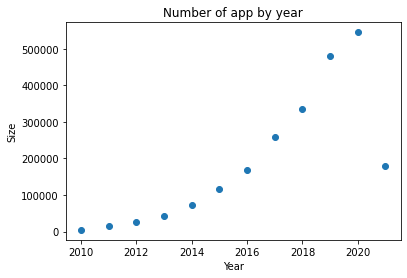

In [26]:
apps_by_year = gps_df.groupby(['ReleasedYear'])['ReleasedYear'].count()
print(apps_by_year)

plt.plot(apps_by_year, 'o')
ax = plt.gca()
ax.set(title='Number of app by year', xlabel='Year', ylabel='Size')

Dữ liệu mãu có vẻ đúng với số lượng app tăng dần theo từng năm, tuy nhiên vì dữ liệu này được thu nhập đầu năm 2021 nên số lượng app được thống kê không đầy đủ. Ta nên loại bỏ năm này ra khỏi tiêu chí đánh giá

Bước 2:

In [27]:
app_sizes_mean = gps_df.groupby(['ReleasedYear'])['Size'].mean().loc[:2020]
app_sizes_max = gps_df.groupby(['ReleasedYear'])['Size'].max().loc[:2020]
app_sizes_min = gps_df.groupby(['ReleasedYear'])['Size'].min().loc[:2020]

Bước 3:

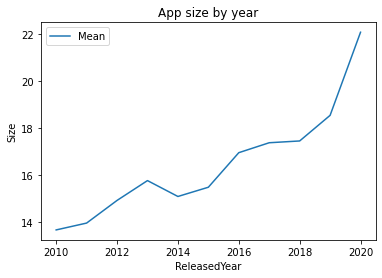

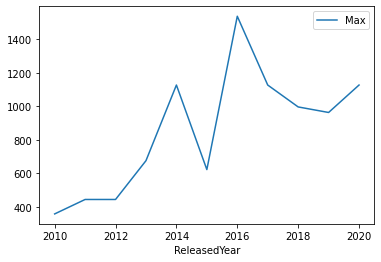

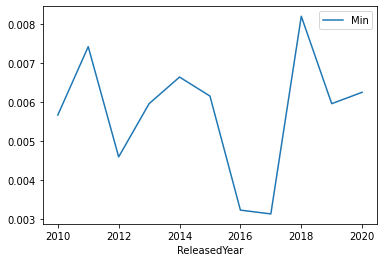

In [28]:
ax = plt.gca()
ax.set(title='App size by year', xlabel='Year', ylabel='Size')
app_sizes_mean.name = 'Mean'
app_sizes_max.name = 'Max'
app_sizes_min.name = 'Min'

app_sizes_mean.plot(legend='Mean')
plt.show()
app_sizes_max.plot(legend='Max')
plt.show()
app_sizes_min.plot(legend='Min')
plt.show()

Biểu đồ cho thấy dự đoán về xu hướng tăng của kích cỡ trung bình của app theo từng năm. Tuy dữ liệu về kích cỡ nhỏ nhất và lớn nhất của app 

Có thể thấy được sự phát triển số lượng của app theo từng năm làm cho số lượng app tăng dần. Nhưng vì dữ liệu này được thu nhập vào đầu năm 2021 nên số app được ghi nhận trong năm 2021 thấp hơn hẳn là hiểu được. Việc loại bỏ dữ liệu các app 2021 không ảnh hưởng nhiều tới nhận định các app có xu hướng nặng hơn gần đây. Điều này có thể giải thích vì các app đang ngày càng nhiều chức năng hơn đồng thời khả năng tính toán của các thiết bị điện thoại cũng tăng nên dung lượng của app không còn là vấn đề lớn nữa.

### Xu hướng app theo free hay tính phí?

Vì xu hướng này khó có thể đưa ra lời giải thích phù hợp nhất với xu hướng được thể hiện ra trên dữ liệu. Ta đánh giá theo năm trước (vì đánh giá ở trên chỉ ra năm 2021 dữ liệu không đầy đủ nên khi đánh giá theo năm ta sẽ không xét đến). Các bước thực hiện như sau:
- Bước 1: ta tính toán và đánh giá xu hướng tăng hay giảm của số lượng ứng dụng cả miễn phí và tính phí
- Bước 2: vẽ đồ thị gồm hai đường xu hướng cho hai kiểu ứng dụng 
- Bước 3: tính toán tỉ lệ hai kiểu ứng dụng theo các năm
- Bước 4: vẽ đồ thị cột cho tỉ lệ hai kiểu ứng dụng
- Bước 5: mở rộng xu hướng này theo một giả định và thực hiện kiểm chứng các giả định này

Bước 1:

In [30]:
apps_by_year = gps_df.groupby(['ReleasedYear', 'Free'])['ReleasedYear'].agg('count')
apps_by_year = apps_by_year.loc[:2020]
apps_by_year

ReleasedYear  Free 
2010.0        False       787
              True       3854
2011.0        False      2147
              True      12215
2012.0        False      2988
              True      22759
2013.0        False      3657
              True      38819
2014.0        False      4421
              True      67394
2015.0        False      4061
              True     111371
2016.0        False      4608
              True     162504
2017.0        False      4995
              True     254690
2018.0        False      5421
              True     329145
2019.0        False      5385
              True     475280
2020.0        False      5254
              True     539628
Name: ReleasedYear, dtype: int64

Bước 2:

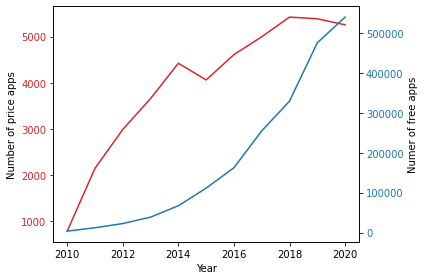

In [31]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of price apps')
ax1.plot(apps_by_year.loc[:, 0], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('Numer of free apps')
ax2.plot(apps_by_year.loc[:, 1], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

Bước 3:

Ta có thể thấy xu hướng app của cả app miễn phí và app tính phí đều tăng. Ta sẽ đánh giá sự thay đổi về tỉ lệ của các app.

In [32]:
apps_by_percents = apps_by_year.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
year_index = apps_by_year.index.get_level_values(0).unique()
apps_percents = {'ReleasedYear': year_index, 'Percents': apps_by_percents.loc[:, 0].values + apps_by_percents.loc[:, 1].values}
free_apps_percents = {'ReleasedYear': year_index, 'Percents': apps_by_percents.loc[:, 1].values}
print(free_apps_percents)

{'ReleasedYear': Float64Index([2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0, 2017.0,
              2018.0, 2019.0, 2020.0],
             dtype='float64', name='ReleasedYear'), 'Percents': array([83.04244775, 85.05082858, 88.39476444, 91.39043224, 93.84390448,
       96.48191143, 97.24256786, 98.07651578, 98.3796919 , 98.87967711,
       99.03575453])}


Bước 4:

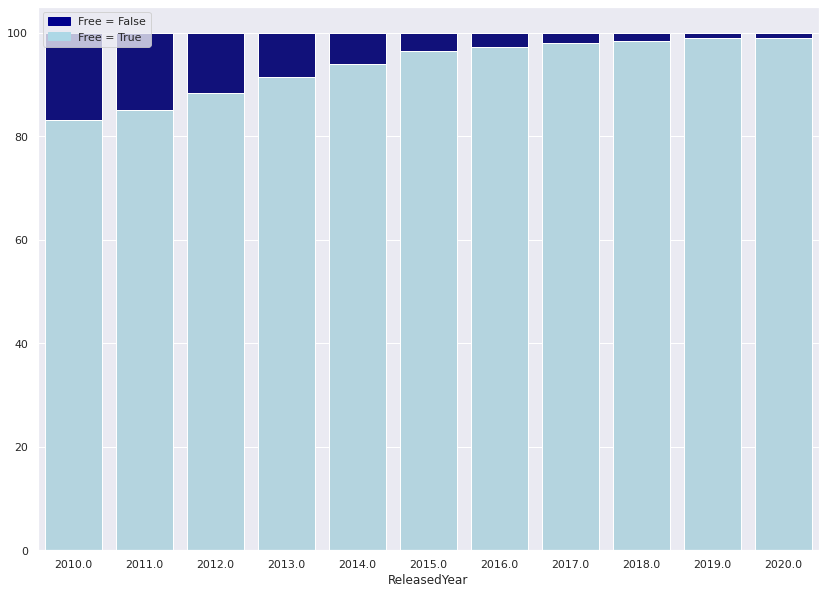

In [33]:
# set the figure size and background color
plt.figure(figsize=(14, 10))
sns.set(style="darkgrid")

bar1 = sns.barplot(x='ReleasedYear', y='Percents', data=apps_percents, color='darkblue')

bar2 = sns.barplot(x='ReleasedYear', y='Percents', data=free_apps_percents, color='lightblue')

# add legend
top_bar = mpatches.Patch(color='darkblue', label='Free = False')
bottom_bar = mpatches.Patch(color='lightblue', label='Free = True')
plt.legend(handles=[top_bar, bottom_bar])

# show the graph
plt.show()

Ta dễ dàng đánh giá được xu hướng tỉ lệ các ứng dụng free ngày càng tăng và chiếm nhiều hơn trong số lượng app. Nhưng thị trường kinh doanh ứng dụng di động ngày càng lớn, nên có thể dự đoán rằng phương thức thanh toán hay các kênh kiếm tiền phải chuyển qua các hình thức khác. Ta sẽ xem xét về tỉ lệ sử dụng ad và các thanh toán trong app để xác nhận nhận định này.

Bước 5:

Ta xem xét xu hướng quảng cáo trong app và xu huớng giao dịch trong app

In [37]:
temp = gps_df.groupby(['ReleasedYear', 'Free', 'Ad Supported'])['App Id'].count()
num_ads_app_by_year = temp.loc[:, True, :].loc[:2020]
temp = gps_df.groupby(['ReleasedYear', 'Free', 'In App Purchases'])['App Id'].count()
num_in_purch_app_by_year = temp.loc[:, True, :].loc[:2020]
print('Thống kê số app free có để quảng cáo trong app')
print(num_ads_app_by_year)
print('Thống kê số app free có thực hiện mua bán trong app')
print(num_in_purch_app_by_year)

Thống kê số app free có để quảng cáo trong app
ReleasedYear  Ad Supported
2010.0        False             1818
              True              2036
2011.0        False             6104
              True              6111
2012.0        False            11759
              True             11000
2013.0        False            19735
              True             19084
2014.0        False            33824
              True             33570
2015.0        False            54790
              True             56581
2016.0        False            83993
              True             78511
2017.0        False           127020
              True            127670
2018.0        False           162574
              True            166571
2019.0        False           231571
              True            243709
2020.0        False           258632
              True            280996
Name: App Id, dtype: int64
Thống kê số app free có thực hiện mua bán trong app
ReleasedYear  In App Purchases
20

<AxesSubplot:xlabel='ReleasedYear', ylabel='Percent'>

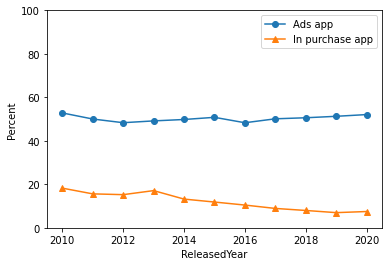

In [67]:
ads_apps_by_percents = num_ads_app_by_year.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
ads_apps_by_percents = ads_apps_by_percents.loc[:, True]
in_purch_apps_by_percents = num_in_purch_app_by_year.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
in_purch_apps_by_percents = in_purch_apps_by_percents.loc[:, True]

ads_apps_by_percents.name = 'Ads app'
in_purch_apps_by_percents.name = 'In purchase app'
plt.subplot()
ax = plt.gca()
ax.set_ylabel('Percent')
ax.set_ylim(0, 100)

ads_apps_by_percents.plot(marker='o', legend='Ads app')
in_purch_apps_by_percents.plot(marker='^', legend='In purchase app')

Trái ngược với dự đoán ban đầu, tỉ lệ số app có chạy quảng cáo không thay đổi gì nhiều qua các năm. Trong khi đó số app có thực hiện giao dịch trong app lại còn có xu hướng giảm nữa. Vậy nhận định đã đưa ra ở trên là sai.

## Nhìn lại quá trình làm đồ án

### Thành viên: Nguyễn Đình Hoàng Phúc

### Thành viên: Lê Đặng Thiên Phúc

## Tài liệu tham khảo